In [1]:
import re
import json
import pandas as pd
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
regex = re.compile(r'Trade\sHistory:(.*)', re.DOTALL)
activity_log = ""
with open('../logs/8fff0ecf-7477-4ef6-a709-ab087603fc92.log', 'r') as f:
    text = f.read()
    match = regex.search(text)
    activity_log = match.group(1)
    rows = activity_log.strip().split('\n')

trade_records = json.loads(activity_log)
trade_records

[{'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10004,
  'quantity': 1},
 {'timestamp': 0,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5003,
  'quantity': 13},
 {'timestamp': 1100,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 9996,
  'quantity': 2},
 {'timestamp': 1700,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10002,
  'quantity': 1},
 {'timestamp': 1700,
  'buyer': '',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 8},
 {'timestamp': 1800,
  'buyer': '',
  'seller': '',
  'symbol': 'AMETHYSTS',
  'currency': 'SEASHELLS',
  'price': 10002,
  'quantity': 1},
 {'timestamp': 1900,
  'buyer': 

In [3]:
trade_records = [item for item in trade_records if item['symbol']=='STARFRUIT']

for item in trade_records:
    item['timestamp'] = item['timestamp']/100

In [5]:
time_intervals = [tuple(range(i, i+18)) for i in range(0, 2000, 18)]
time_buckets = {k:0 for k in time_intervals}

bucket_keys = [key for key in time_buckets.keys()]
for trade in trade_records:
    time_stamp = trade['timestamp']
    for key in bucket_keys:
        if time_stamp in key:
            time_buckets[key] += 1
            break
sum(list(time_buckets.values()))/len(list(time_buckets.keys()))

6.910714285714286

In [8]:
time_intervals = [tuple(range(i, i+18)) for i in range(0, 2000, 25)]
time_buckets = {k:0 for k in time_intervals}

bucket_keys = [key for key in time_buckets.keys()]
for trade in trade_records:
    time_stamp = trade['timestamp']
    for key in bucket_keys:
        if time_stamp in key:
            time_buckets[key] += 1
            break
sum(list(time_buckets.values()))/len(list(time_buckets.keys()))

7.1

81100
90900
97500
111000
151600
157600
179200


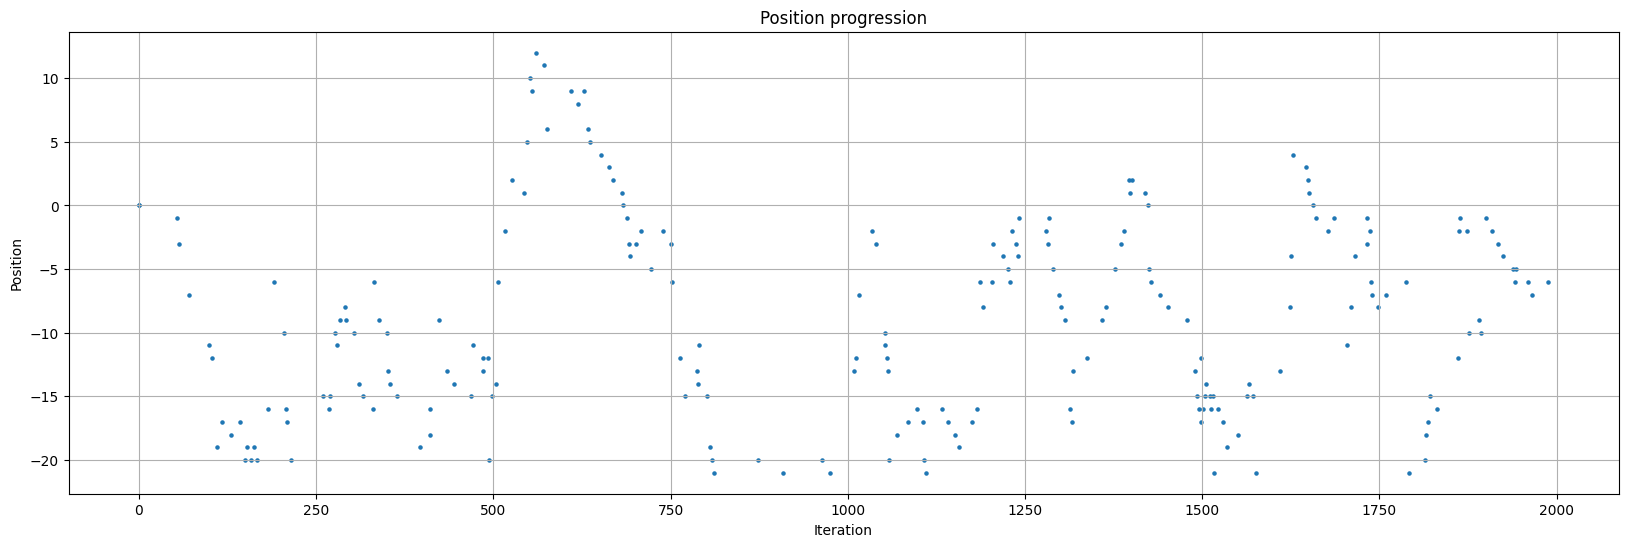

In [19]:
regex = re.compile(r'Trade\sHistory:(.*)', re.DOTALL)
activity_log = ""
with open('../logs/trader_6_0331.log', 'r') as f:
    text = f.read()
    match = regex.search(text)
    activity_log = match.group(1)
    rows = activity_log.strip().split('\n')

trade_records = json.loads(activity_log)
trade_records = [trade for trade in trade_records if (trade['buyer']=='SUBMISSION' or trade['seller']=='SUBMISSION') and trade['symbol']=='STARFRUIT']

position = 0
positions = [(0,0)]
prev_stamp = 0

for i in range(len(trade_records)):
    trade_i = trade_records[i]

    timestamp = trade_i['timestamp']
    assert timestamp >= prev_stamp, print(f"{timestamp}, {prev_stamp}")
    # if (timestamp != prev_stamp and position != positions[-1][1]):
    if timestamp != prev_stamp:
        positions.append((prev_stamp, position))
    
    if trade_i['buyer'] == 'SUBMISSION':
        position += trade_i['quantity']
    elif trade_i['seller'] == 'SUBMISSION':
        position -= trade_i['quantity']
    prev_stamp = timestamp

    if position < -20:
        print(timestamp)

positions = [(int(timestamp/100), position) for timestamp, position in positions ]

plt.figure(figsize=(20, 6))
plt.scatter([pos[0] for pos in positions], [pos[1] for pos in positions], s=5)


plt.xlabel('Iteration')
plt.ylabel('Position')
plt.title('Position progression')


plt.grid(True)
plt.show()

In [15]:
trade_records

[{'timestamp': 5300,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 1},
 {'timestamp': 5600,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 2},
 {'timestamp': 7000,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 4},
 {'timestamp': 9900,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5001,
  'quantity': 4},
 {'timestamp': 10300,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5001,
  'quantity': 1},
 {'timestamp': 11000,
  'buyer': '',
  'seller': 'SUBMISSION',
  'symbol': 'STARFRUIT',
  'currency': 'SEASHELLS',
  'price': 5002,
  'quantity': 7},
 {'timestamp': 11700,
  'buyer': 'SUBMISSION',
  'seller': '',
  'symbol': 'STARFRUIT',
  'currency': 'S

In [7]:
import numpy as np

def linear_regression(X, y):
    """
    Perform linear regression using ordinary least squares method.
    
    Parameters:
    X : array-like, shape (n_samples, n_features)
        Independent variables.
    y : array-like, shape (n_samples,)
        Dependent variable.
        
    Returns:
    coeffs : array, shape (n_features,)
        Coefficients of the linear regression model.
    std_errs : array, shape (n_features,)
        Standard errors of the coefficients.
    """
    # Add a constant term for the intercept
    X = np.column_stack((np.ones_like(y), X))
    
    # Calculate coefficients
    coeffs = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Calculate residuals
    residuals = y - X @ coeffs
    
    # Degrees of freedom
    n = X.shape[0]
    p = X.shape[1]
    dof = n - p
    
    # Estimate variance of residuals
    var_residuals = np.sum(residuals ** 2) / dof
    
    # Covariance matrix of coefficients
    cov_coeffs = var_residuals * np.linalg.inv(X.T @ X)
    
    # Standard errors of coefficients
    std_errs = np.sqrt(np.diag(cov_coeffs))
    
    # return coeffs[1:], std_errs[1:]
    return coeffs, std_errs

# Sample data
X = np.array([[1],[2],[3],[4]])
y = np.dot(X, np.array([1])) + 3

# Perform linear regression
coefficients, std_devs = linear_regression(X, y)

print("Coefficients:", coefficients)
print("Standard deviations:", std_devs)
print(y)
print(X)


Coefficients: [3. 1.]
Standard deviations: [5.21686699e-15 1.90493049e-15]
[4 5 6 7]
[[1]
 [2]
 [3]
 [4]]


In [1]:
import numpy as np
X = [1,2,3,4]
Y = [3,4,5,6]
X = np.column_stack((np.ones_like(Y), X))

In [2]:
X

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4]])

In [3]:
np.array([1,2]) @ np.array([2,3])

8